In [1]:
%pip install matplotlib opencv-python deepface tf-keras pytube

Note: you may need to restart the kernel to use updated packages.


In [2]:
import collections
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt
import seaborn as sns

2024-09-03 00:18:44.274928: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture("video/Debate2023 Segundo Debate Presidencial  Facultad de Derecho - UBA.mp4")

In [4]:
p = 0

ret = True

time = []
angry = []
disgust = []
fear = []
happy = []
sad = []
surprise = []
neutral = []
emotions = []

In [5]:
while ret:
    ret, frame = cap.read()

    if ret and p % 150 == 0:

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        rgb_frame = cv2.cvtColor(gray_frame, cv2.COLOR_GRAY2RGB)

        faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(150, 150))

        for (x, y, w, h) in faces:
            face_roi = rgb_frame[y:y + h, x:x + w]
            
            result = DeepFace.analyze(face_roi, actions=['emotion'], enforce_detection=False)

            emotion = result[0]['dominant_emotion']

            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.putText(frame, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

            time.append(p)
            emotions.append(emotion)

            if emotion == "angry":
                angry.append(1)
                disgust.append(0)
                fear.append(0)
                happy.append(0)
                sad.append(0)
                surprise.append(0)
                neutral.append(0)
            elif emotion == "disgust":
                angry.append(0)
                disgust.append(1)
                fear.append(0)
                happy.append(0)
                sad.append(0)
                surprise.append(0)
                neutral.append(0)
            elif emotion == "fear":
                angry.append(0)
                disgust.append(0)
                fear.append(1)
                happy.append(0)
                sad.append(0)
                surprise.append(0)
                neutral.append(0)
            elif emotion == "happy":
                angry.append(0)
                disgust.append(0)
                fear.append(0)
                happy.append(1)
                sad.append(0)
                surprise.append(0)
                neutral.append(0)
            elif emotion == "sad":
                angry.append(0)
                disgust.append(0)
                fear.append(0)
                happy.append(0)
                sad.append(1)
                surprise.append(0)
                neutral.append(0)
            elif emotion == "surprise":
                angry.append(0)
                disgust.append(0)
                fear.append(0)
                happy.append(0)
                sad.append(0)
                surprise.append(1)
                neutral.append(0)
            elif emotion == "neutral":
                angry.append(0)
                disgust.append(0)
                fear.append(0)
                happy.append(0)
                sad.append(0)
                surprise.append(0)
                neutral.append(1)


        #cv2.imshow('Real-time Emotion Detection', frame)
        #cv2.imwrite(f"frames_output/frame{p}_detected.png", frame)

        #if cv2.waitKey(1) & 0xFF == ord('q'):
        #    break
    p = p + 1


In [6]:
cap.release()
cv2.destroyAllWindows()

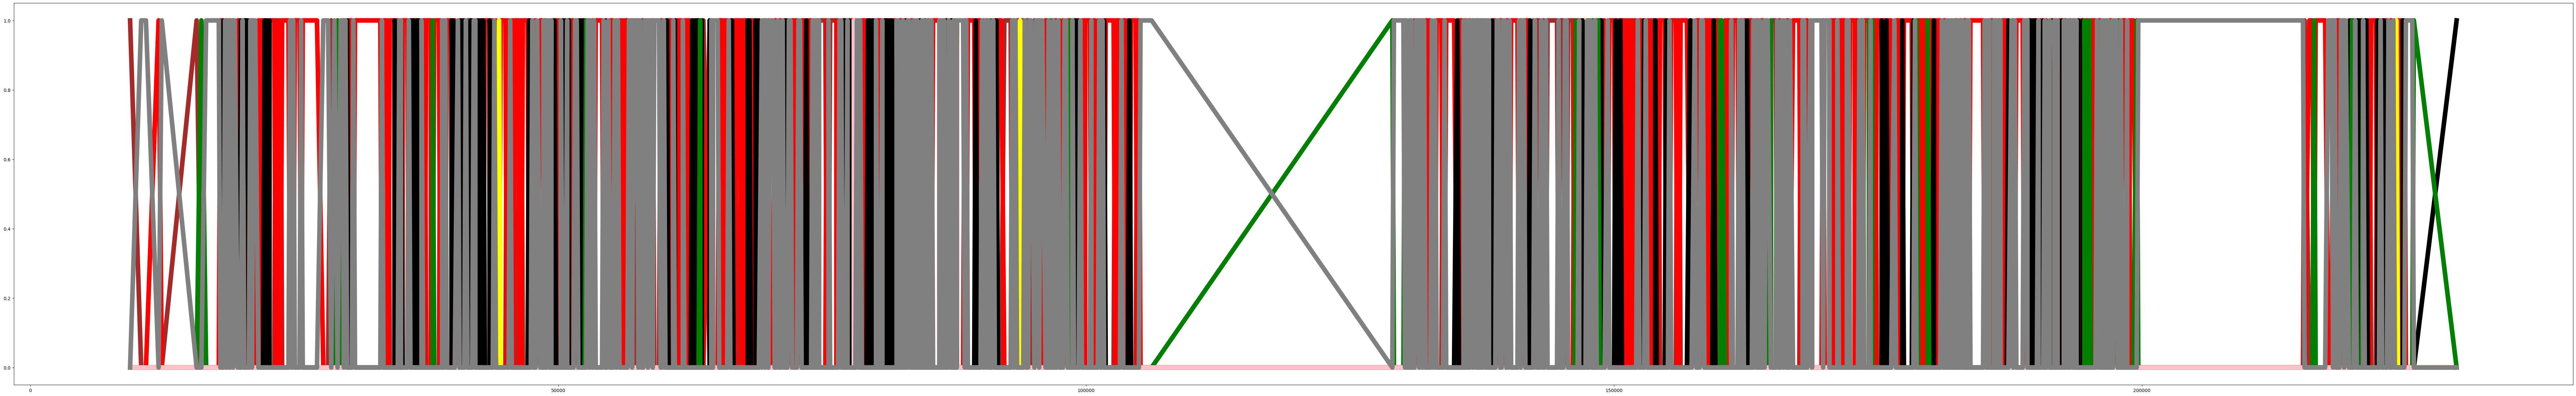

In [7]:
# ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]
plt.figure(figsize = (100,15), linewidth=6.5)
plt.plot(time, angry, label='y over time', color='brown', linewidth=10)
plt.plot(time , sad, label='z over time', color='red', linewidth=10)
plt.plot(time , surprise, label='z over time', color='yellow', linewidth=10)
plt.plot(time , fear, label='z over time', color='black', linewidth=10)
plt.plot(time , happy, label='z over time', color='green', linewidth=10)
plt.plot(time , disgust, label='z over time', color='pink', linewidth=10)
plt.plot(time , neutral, label='z over time', color='gray', linewidth=10)

In [8]:
collections.Counter(emotions)

Counter({'sad': 762,
         'neutral': 336,
         'angry': 306,
         'fear': 120,
         'happy': 34,
         'surprise': 9,
         'disgust': 1})

<Axes: >

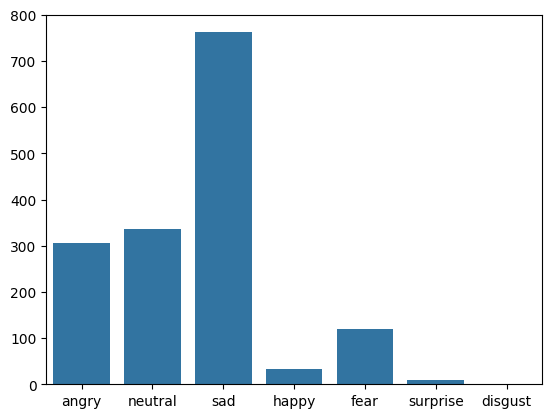

In [9]:
sns.barplot(collections.Counter(emotions))